In [1]:
# если выдает ошибку с пакетами
# установить пакеты и перезапустить ядро
# TODO: сделать установку окружений

# !pip install scikit-learn --force
# !pip install catboost
# !pip install sktime==0.15.1
# !pip install pandas==1.3.5

In [2]:
import sys
sys.path.append('../..')
import pandas as pd

pd.set_option('display.max.columns', 300)



from core.definitions import *

from warnings import filterwarnings
filterwarnings('ignore')


import matplotlib.pyplot as plt

# для записи и чтения экселя
import pip
pip.main(['install', 'openpyxl'])


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://nxrm:8081/repository/pypi/simple


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


## Чтение прогнозов

In [4]:
import pickle


# with open('res_dict.pickle', 'wb') as handle:
#     pickle.dump(res_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('res_dict.pickle', 'rb') as handle:
    res_dict = pickle.load(handle)


## Загрузка таблиц фактов

In [7]:
# sa_table = spark.table('prod_dadm_alm_sbx.almde_fl_dpst_saving_accounts_monthly_avg_feature')
# sa_table_pd = sa_table.toPandas()
# sa_table_pd.to_csv('./fact_data/sa_fact.csv')

In [8]:
# ca_table = spark.table('prod_dadm_alm_sbx.almde_fl_dpst_current_accounts')
# ca_table_pd = ca_table.toPandas()
# ca_table_pd.to_csv('./fact_data/ca_fact.csv')

In [9]:
sa_table_pd = pd.read_csv('./fact_data/sa_fact.csv')
ca_table_pd = pd.read_csv('./fact_data/ca_fact.csv')

In [15]:
sa_table_pd = sa_table_pd.sort_values(by='report_dt')
ca_table_pd = ca_table_pd.sort_values(by='report_dt')

In [18]:
sa_table_pd.tail()[['report_dt', 'SA_avg_balance_[general]_[mass]', 'SA_avg_balance_[general]_[priv]', 'SA_avg_balance_[general]_[vip]']]

,report_dt,SA_avg_balance_[general]_[mass],SA_avg_balance_[general]_[priv],SA_avg_balance_[general]_[vip]
79,2024-05-31,8.189205e+11,4.094633e+11,8.854591e+10
80,2024-06-30,8.879335e+11,4.483153e+11,1.165230e+11
42,2024-07-31,9.809697e+11,5.166332e+11,1.371393e+11
43,2024-08-31,1.007121e+12,5.599451e+11,1.568668e+11
44,2024-09-30,9.638511e+11,5.616423e+11,1.470692e+11


In [24]:
sa_table_pd.tail()[['report_dt', 'SA_avg_balance_[general]_[mass]', 'SA_avg_balance_[general]_[priv]', 'SA_avg_balance_[general]_[vip]']].sum(axis=1)

79    1.316930e+12
80    1.452772e+12
42    1.634742e+12
43    1.723933e+12
44    1.672563e+12
dtype: float64

In [30]:
1.6/1.34

1.1940298507462686

In [17]:
ca_table_pd.tail()

,Unnamed: 0,report_dt,balance_cny_[general],balance_eur_[general],balance_oth_[general],balance_rub_[general],balance_usd_[general],balance_rub_[mass],balance_rub_[priv],balance_rub_[vip],rate_ruonia,VTB_ftp_rate_[90d],VTB_ftp_rate_[730d]
124,124,2024-05-31,3.193282e+08,5.105431e+08,1.154572e+10,6.809284e+11,1.080224e+09,5.109026e+11,1.195101e+11,5.051573e+10,15.947500,17.100000,14.858065
125,125,2024-06-30,3.462774e+08,5.058765e+08,1.105591e+10,7.083955e+11,1.084337e+09,5.346651e+11,1.228598e+11,5.087055e+10,15.651053,17.310000,16.263333
126,126,2024-07-31,3.547077e+08,5.059242e+08,1.214104e+10,7.478071e+11,1.098656e+09,5.729349e+11,1.233124e+11,5.155979e+10,16.113478,18.575806,17.916129
127,127,2024-08-31,3.148768e+08,5.020493e+08,1.184707e+10,8.132118e+11,1.102731e+09,5.974652e+11,1.514463e+11,6.430026e+10,17.743182,19.450000,18.300000
128,128,2024-09-30,2.738400e+08,4.943824e+08,1.211032e+10,8.911279e+11,1.100793e+09,6.307825e+11,1.819677e+11,7.837774e+10,18.390476,20.225000,19.900000


#### Сравнение разных вариантов сценариев

In [ ]:
delta1 = (res_dict['parse_sc_v2_r21']['scenario'] - res_dict['parse_sc_v1_r21']['scenario']).T

In [ ]:
delta1[(delta1!=0).all(axis=1)]

* Трансферты выросли на 1%  
* основной рост без опций - в срочностях 90 и 365  
* основной рост с пополнением без снятий - 90 и 180  
* основной рост с пополнением и снятиями - 90 и 180  
* __у второго варианта сценариев ставки выше__ 

In [ ]:
delta2 = (res_dict['parse_sc_v2_r22']['scenario'] - res_dict['parse_sc_v1_r22']['scenario']).T

In [ ]:
delta2[(delta2!=0).all(axis=1)]

* Трансферты выросли на 1%  
* основной рост без опций - в срочностях 90, 185 и 365. В основном на 180 - 2%    
* __у второго варианта сценариев ставки выше__ 

#### Ниже - дельты по новым сценариям

In [ ]:
delta3 = (res_dict['parse_sc_v2_r22']['scenario'] - res_dict['parse_sc_v2_r21']['scenario']).T
delta3[(delta1!=0).all(axis=1)]

* Трансфертные ставки поднялись на 1% равномерно  
* Увеличились срочности до года для всех сегментов без опций: 90, 180 и 365. Наибольший рост - на 1.8% на 180 дней

#### Идея - отранжировать по величине ставки

In [19]:
# порядок по увеличению ставок

sc_names_soreted_rates = ['parse_sc_v1_r20', 
                          'parse_sc_v1_r21',
                          'parse_sc_v2_r21',
                          'parse_sc_v1_r22',
                          'parse_sc_v2_r22'
                         ]

## Анализ прогнозов

Потом можно откорректировать через досрочку

In [20]:
for sc in sc_names_soreted_rates:
    print(sc, res_dict[sc]['scenario']['rate_sa_weighted'][0])

parse_sc_v1_r20 16
parse_sc_v1_r21 17
parse_sc_v2_r21 17
parse_sc_v1_r22 17.5
parse_sc_v2_r22 17.5


## Накопительные счета

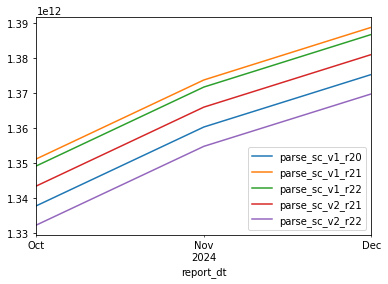

In [25]:
res_dict['parse_sc_v1_r20']['SavingAccounts'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r20')
res_dict['parse_sc_v1_r21']['SavingAccounts'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r21')
res_dict['parse_sc_v1_r22']['SavingAccounts'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r22')

res_dict['parse_sc_v2_r21']['SavingAccounts'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r21')
res_dict['parse_sc_v2_r22']['SavingAccounts'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r22')

plt.legend()

Отрабатывает корректно потому что всокие ставки по депозитам начинаются позже

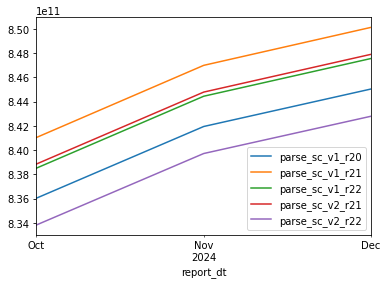

In [26]:
segm = 'mass'

res_dict['parse_sc_v1_r20']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r20')
res_dict['parse_sc_v1_r21']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r21')
res_dict['parse_sc_v1_r22']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r22')

res_dict['parse_sc_v2_r21']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r21')
res_dict['parse_sc_v2_r22']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r22')

plt.legend()

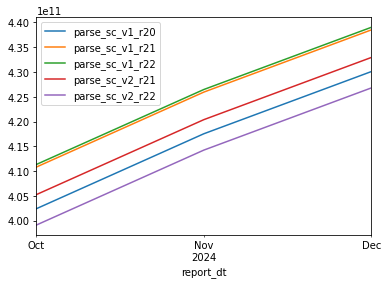

In [27]:
segm = 'priv'

res_dict['parse_sc_v1_r20']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r20')
res_dict['parse_sc_v1_r21']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r21')
res_dict['parse_sc_v1_r22']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r22')

res_dict['parse_sc_v2_r21']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r21')
res_dict['parse_sc_v2_r22']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r22')

plt.legend()

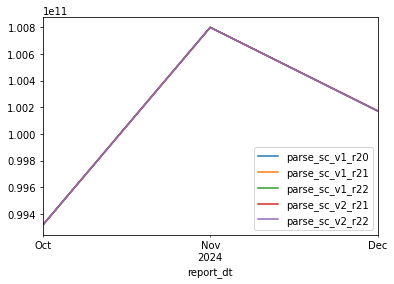

In [28]:
segm = 'vip'

res_dict['parse_sc_v1_r20']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r20')
res_dict['parse_sc_v1_r21']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r21')
res_dict['parse_sc_v1_r22']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r22')

res_dict['parse_sc_v2_r21']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r21')
res_dict['parse_sc_v2_r22']['SavingAccounts'].query(f'segment=="{segm}"').groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r22')

plt.legend()

## Фиксим

In [29]:
sc_names_soreted_rates

['parse_sc_v1_r20',
 'parse_sc_v1_r21',
 'parse_sc_v2_r21',
 'parse_sc_v1_r22',
 'parse_sc_v2_r22']

In [35]:
res_dict_agg_fix = {}

for sc_name in sc_names_soreted_rates:
    tmp1 = res_dict[sc_name]['SavingAccounts'].copy()
    
    tmp1['general']  = tmp1['general'] * 1.2
    
    res_dict_agg_fix[sc_name] = tmp1

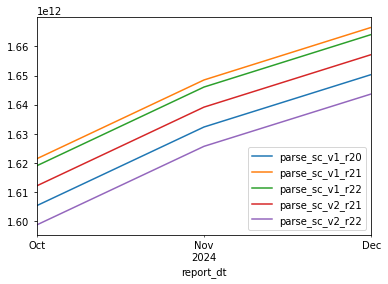

In [38]:
res_dict_agg_fix['parse_sc_v1_r20'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r20')
res_dict_agg_fix['parse_sc_v1_r21'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r21')
res_dict_agg_fix['parse_sc_v1_r22'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v1_r22')

res_dict_agg_fix['parse_sc_v2_r21'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r21')
res_dict_agg_fix['parse_sc_v2_r22'].groupby('report_dt').sum()['general'].plot(label='parse_sc_v2_r22')

plt.legend()

Трансферты у 2-го варианта выше

## Тестирование прогнозов и сверка с фактом

In [ ]:
fact_data = pd.read_csv('./fact_data/dpst_table_gr_pd.csv', index_col='Unnamed: 0')

In [ ]:
df_fact = pd.DataFrame(fact_data.groupby('report_dt').sum()['balance']).reset_index()

In [ ]:
df_fact.tail(10)

In [ ]:
mass = fact_data[fact_data.is_vip_or_prv==0].sort_values(by='report_dt')
priv = fact_data[fact_data.is_vip_or_prv==1].sort_values(by='report_dt')
vip = fact_data[fact_data.is_vip_or_prv==2].sort_values(by='report_dt')

In [ ]:
mass.tail(10)

In [ ]:
priv.tail(10)

In [ ]:
vip.tail(10)

In [ ]:
import plotly.express as px

fig = px.line(df_fact, x="report_dt", y="balance", title='fact balance')
fig.show()

### Анализ нового бизнеса

In [ ]:
nb_data = pd.read_csv('./fact_data/nb_fact_pd.csv', index_col='Unnamed: 0')

In [ ]:
nb_data.tail(10)

## Сохранение прогнозов

In [39]:
# res_dict_agg_fix

In [ ]:
sc_names_soreted_rates

In [40]:
# для записи и чтения экселя
import pip
pip.main(['install', 'openpyxl'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://nxrm:8081/repository/pypi/simple


0

In [42]:
for sc_name in sc_names_soreted_rates:

    with pd.ExcelWriter(f"./results/sa_{sc_name[-9:]}.xlsx") as writer:
        res_dict[sc_name]['scenario'].to_excel(writer, sheet_name='scenario_'+sc_name[-9:], index=False)
        res_dict_agg_fix[sc_name].to_excel(writer, sheet_name='SA_'+sc_name[-9:], index=False)